In [59]:
!pip install kaggle pandas numpy matplotlib seaborn warnings sklearn

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


# Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, Normalizer, Binarizer, StandardScaler
import warnings

In [61]:
# Ignore warnings
warnings.filterwarnings("ignore")

# Kaggle dataset Configuration

In [62]:
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files
files.upload() #this will prompt you to upload the kaggle.json
!ls -lha kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd
!kaggle datasets list
!kaggle datasets download -d omjannu/santandar-csv
!unzip santandar-csv.zip

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving kaggle.json to kaggle (2).json
-rw-r--r-- 1 root root 63 Nov  7 13:37 kaggle.json
/content
ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                 146KB  2023-10-05 06:45:37          19409        413  1.0              
prasad22/healthcare-dataset                                 Healthcare Dataset                               483KB  2023-10-31 11:30:58            816         25  1.0              
rajatsurana979/fast-food-sales-report                       Restaurant Sales report                          122KB  2023-11-06 20:46:39            935         31  1.0            

# Creating Data Frame

In [63]:
df = pd.read_csv("santandar.csv")

# Basic dataset information

In [64]:

print("Columns:", df.columns)
print("Data Types:")
print(df.dtypes)
print("Shape:", df.shape)
print("Descriptive Statistics:")
print(df.describe())

Columns: Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)
Data Types:
ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object
Shape: (76020, 371)
Descrip

# Handling missing values in 'var15'

In [65]:

T = df["var15"].median()
print("Median of var15:", T)
df["var15"] = df["var15"].fillna(T)

Median of var15: 28.0


# Display the first 10 rows after handling missing values

In [66]:

print("First 10 rows after handling missing values:")
print(df.head(10))

First 10 rows after handling missing values:
   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   
5  13     2     23                 0.0                      0.0   
6  14     2     27                 0.0                      0.0   
7  18     2     26                 0.0                      0.0   
8  20     2     45                 0.0                      0.0   
9  23     2     25                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0      

# equalObs function to take both x and nbin as arguments

In [67]:

def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(
        np.linspace(0, nlen, nbin + 1),
        np.arange(nlen),
        np.sort(x)
    )

# Create histogram with equal-frequency bins for 'var15'

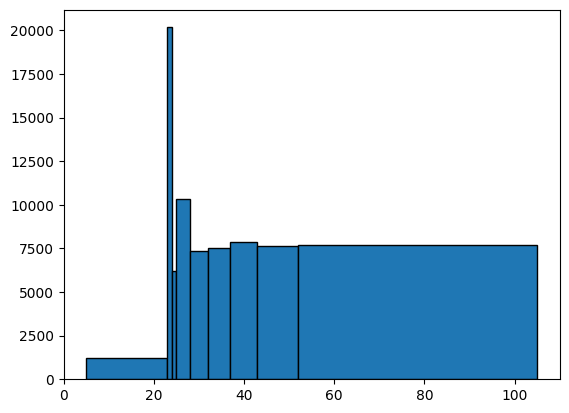

In [68]:

nbin = 10
n, bins, patches = plt.hist(
    df["var15"],
    equalObs(df["var15"], nbin),  # Provide both x and nbin arguments
    edgecolor="black"
)
plt.show()

# Statistical analysis for outliers

In [69]:

Q1 = df["var15"].quantile(0.25)
Q3 = df["var15"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Q1: 23.0
Q3: 40.0
IQR: 17.0
Lower Bound: -2.5
Upper Bound: 65.5


# Filter outliers

In [70]:

outliers_low = df[df["var15"] < lower_bound]
outliers_high = df[df["var15"] > upper_bound]

# Filter data without outliers

In [71]:

df_no_outlier = df[(df["var15"] >= lower_bound) & (df["var15"] <= upper_bound)]

# Plot original and no-outlier histograms

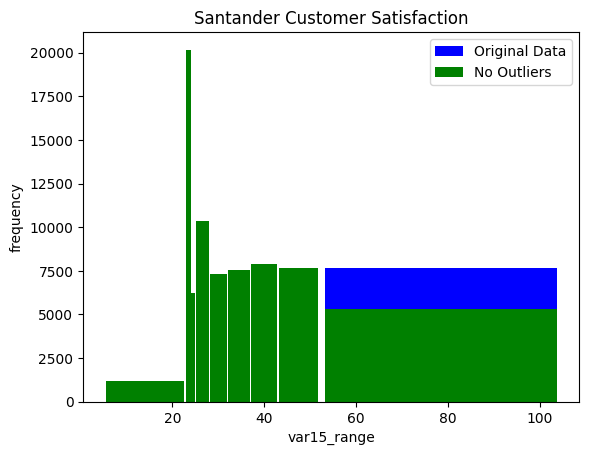

In [72]:

plt.xlabel("var15_range")
plt.ylabel("frequency")
plt.title("Santander Customer Satisfaction")
plt.hist(df.var15, bins, rwidth=0.95, color="blue", label="Original Data")
plt.hist(df_no_outlier.var15, bins, rwidth=0.95, color="green", label="No Outliers")
plt.legend()
plt.show()

# Data Transformation Operations

# Rescaling data [0, 1]

Rescaled data [0, 1]:
[[0.18]
 [0.29]
 [0.18]
 ...
 [0.18]
 [0.2 ]
 [0.41]]


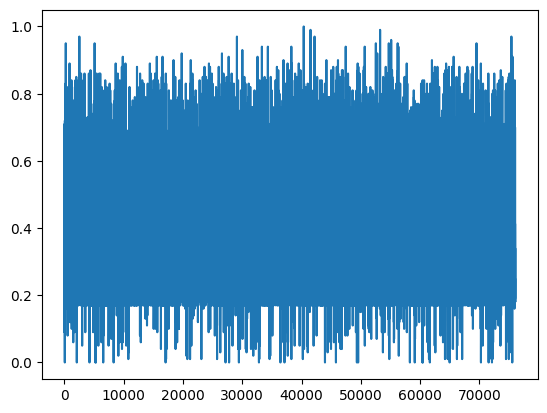

In [74]:

scaled = MinMaxScaler()
scaled_p = scaled.fit_transform(df[["var15"]])
print("Rescaled data [0, 1]:")
print(scaled_p)
plt.plot(scaled_p)

# Rescaling data [0, 10]

Rescaled data [0, 10]:
[[1.8]
 [2.9]
 [1.8]
 ...
 [1.8]
 [2. ]
 [4.1]]


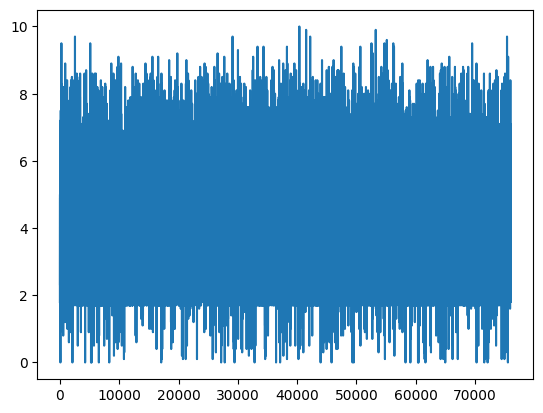

In [75]:

scaled = MinMaxScaler(feature_range=(0, 10))
scaled_p = scaled.fit_transform(df[["var15"]])
print("Rescaled data [0, 10]:")
print(scaled_p)
plt.plot(scaled_p)

# Normalizing data

Normalized data:
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


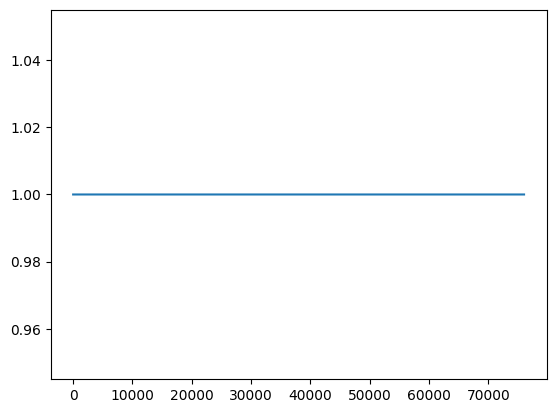

In [76]:

scaled = Normalizer()
scaled_p = scaled.fit_transform(df[["var15"]])
print("Normalized data:")
print(scaled_p)
plt.plot(scaled_p)

# Standardizing data

Standardized data:
[[-0.78824863]
 [ 0.0607526 ]
 [-0.78824863]
 ...
 [-0.78824863]
 [-0.63388477]
 [ 0.98693575]]


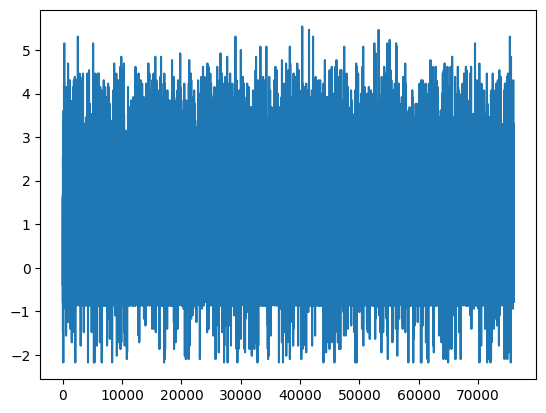

In [77]:

scaled = StandardScaler()
scaled_p = scaled.fit_transform(df[["var15"]])
print("Standardized data:")
print(scaled_p)
plt.plot(scaled_p)

# Binarizing data with threshold 5

In [78]:

scaled = Binarizer(threshold=5)
scaled_p = scaled.fit_transform(df[["var15", "var3"]])
print("Binarized data with threshold 5:")
print(scaled_p)

Binarized data with threshold 5:
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


# Binarizing data with threshold 5 for 'var15'

In [79]:

scaled = Binarizer(threshold=5)
scaled_p = scaled.fit_transform(df[["var15"]])
print("Binarized 'var15' data with threshold 5:")
print(scaled_p)

Binarized 'var15' data with threshold 5:
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
